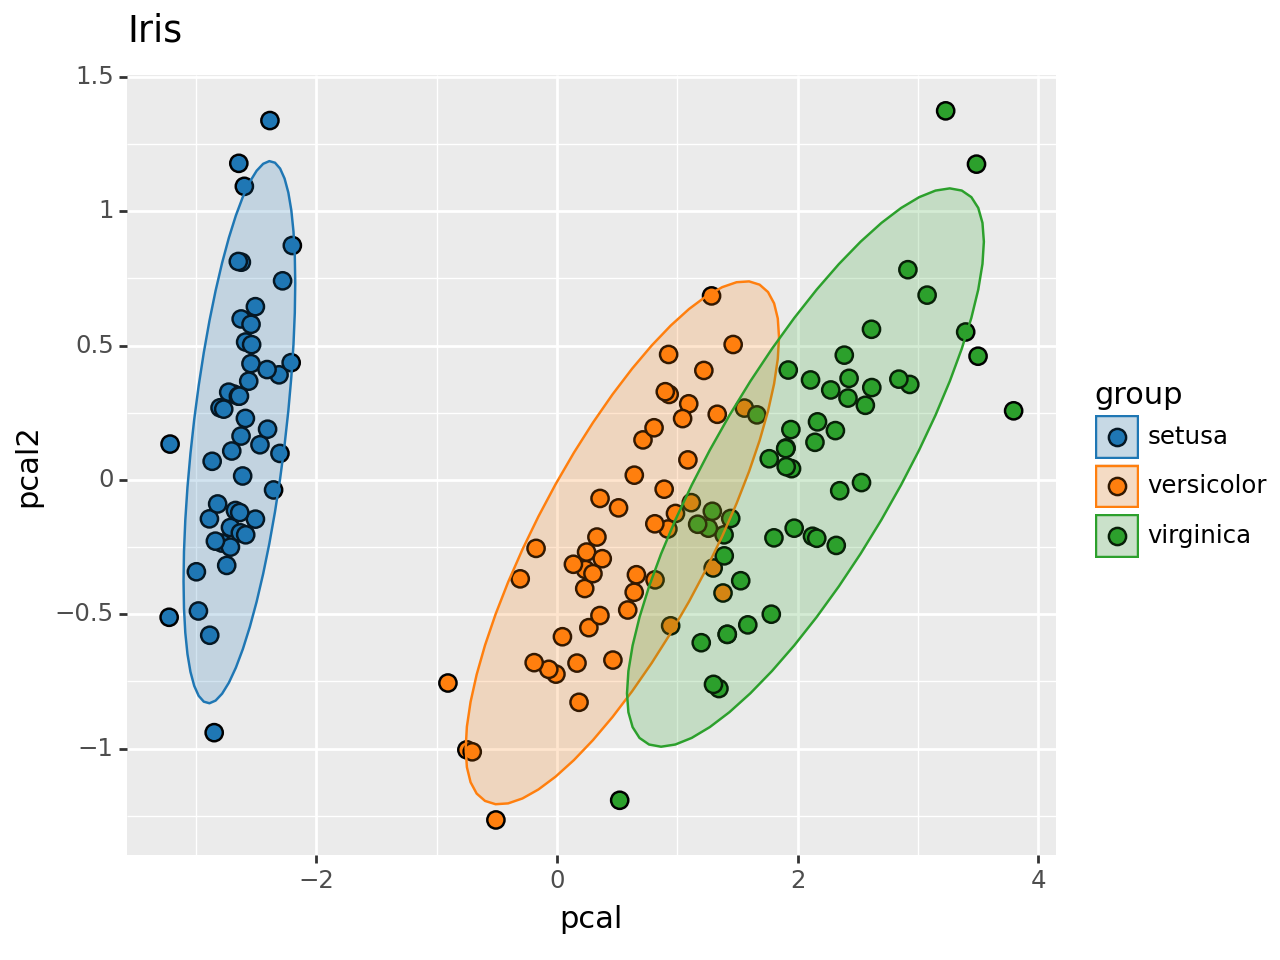

In [6]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from plotnine import ggplot, aes, geom_point, stat_ellipse, labs, theme_gray, theme_minimal, scale_color_manual, scale_fill_manual

# 加载 Iris 数据集并进行 PCA 降维
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 使用 PCA 将数据降维到 2 维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 将数据转换为 DataFrame 格式，并添加中文物种名称
species_names = {0: "setusa", 1: 'versicolor', 2: "virginica"}
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['species'] = [species_names[i] for i in y]

# 设置颜色映射
species_colors = {"setusa": "#1f77b4", "versicolor": "#ff7f0e", "virginica": "#2ca02c"}

# 使用 plotnine 绘制散点图并添加填充颜色的椭圆标定
plot = (
    ggplot(df, aes(x='PC1', y='PC2', color='species',fill='species'))
    + geom_point(size=3,color='black')
    + stat_ellipse(geom="polygon", alpha=0.2)
    + scale_color_manual(values=species_colors)
    + scale_fill_manual(values=species_colors)
    + labs(title="Iris",x='pcal',y='pcal2', color="group", fill="group")
    + theme_minimal()
    + theme_gray()
)

print(plot)

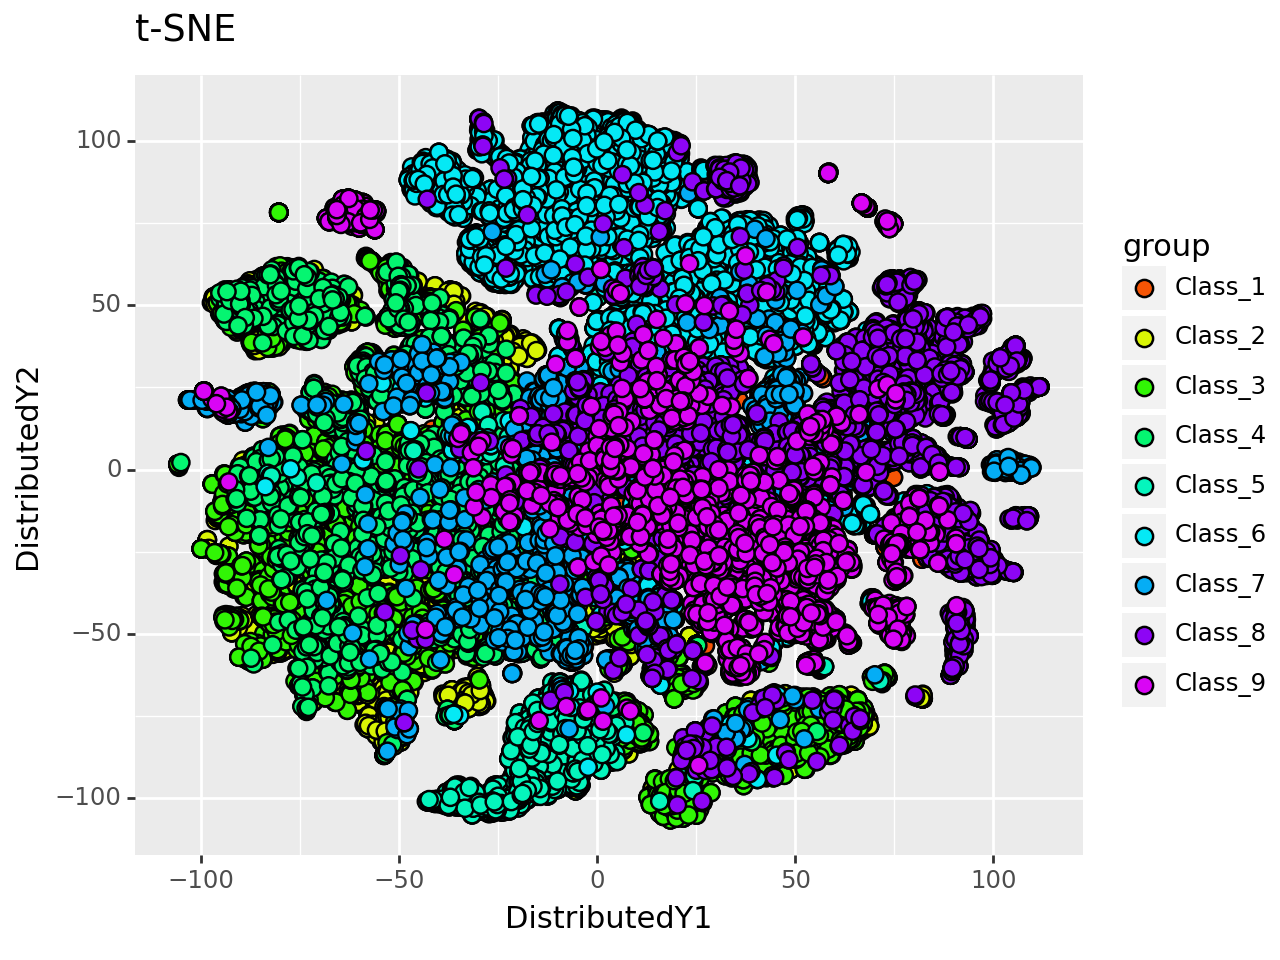

In [13]:
import pandas as pd
from sklearn import datasets
from sklearn import manifold
from plotnine import *

df = pd.read_csv('Tsne_Data.csv')

X = df.loc[:, 'feat_1':'feat_93']
y = df['target']

tsne = manifold.TSNE(n_components=2)
x_tsne = tsne.fit_transform(X)

classname = {
    "Class_1": "#f55505", "Class_2": "#d9f505", "Class_3": "#31f505", "Class_4": "#05f571",
    "Class_5": "#05f5bd", "Class_6": "#05e9f5", "Class_7": "#05adf5", "Class_8": "#8d05f5",
    "Class_9": "#d905f5"
}
df_plot = pd.DataFrame(x_tsne, columns=['DistributedY1', 'DistributedY2'])
df_plot['Class'] = y

plot = (
    ggplot(df_plot, aes(x='DistributedY1', y='DistributedY2', color='Class', fill='Class'))
    + geom_point(size=3, color='black')
    #+ stat_ellipse(geom="polygon", alpha=0.2)
    + scale_color_manual(values=classname)
    + scale_fill_manual(values=classname)
    + labs(title="t-SNE", x='DistributedY1', y='DistributedY2', color="group", fill="group")
    + theme_minimal()
    + theme_gray()
)

print(plot)


<Figure size 800x600 with 0 Axes>

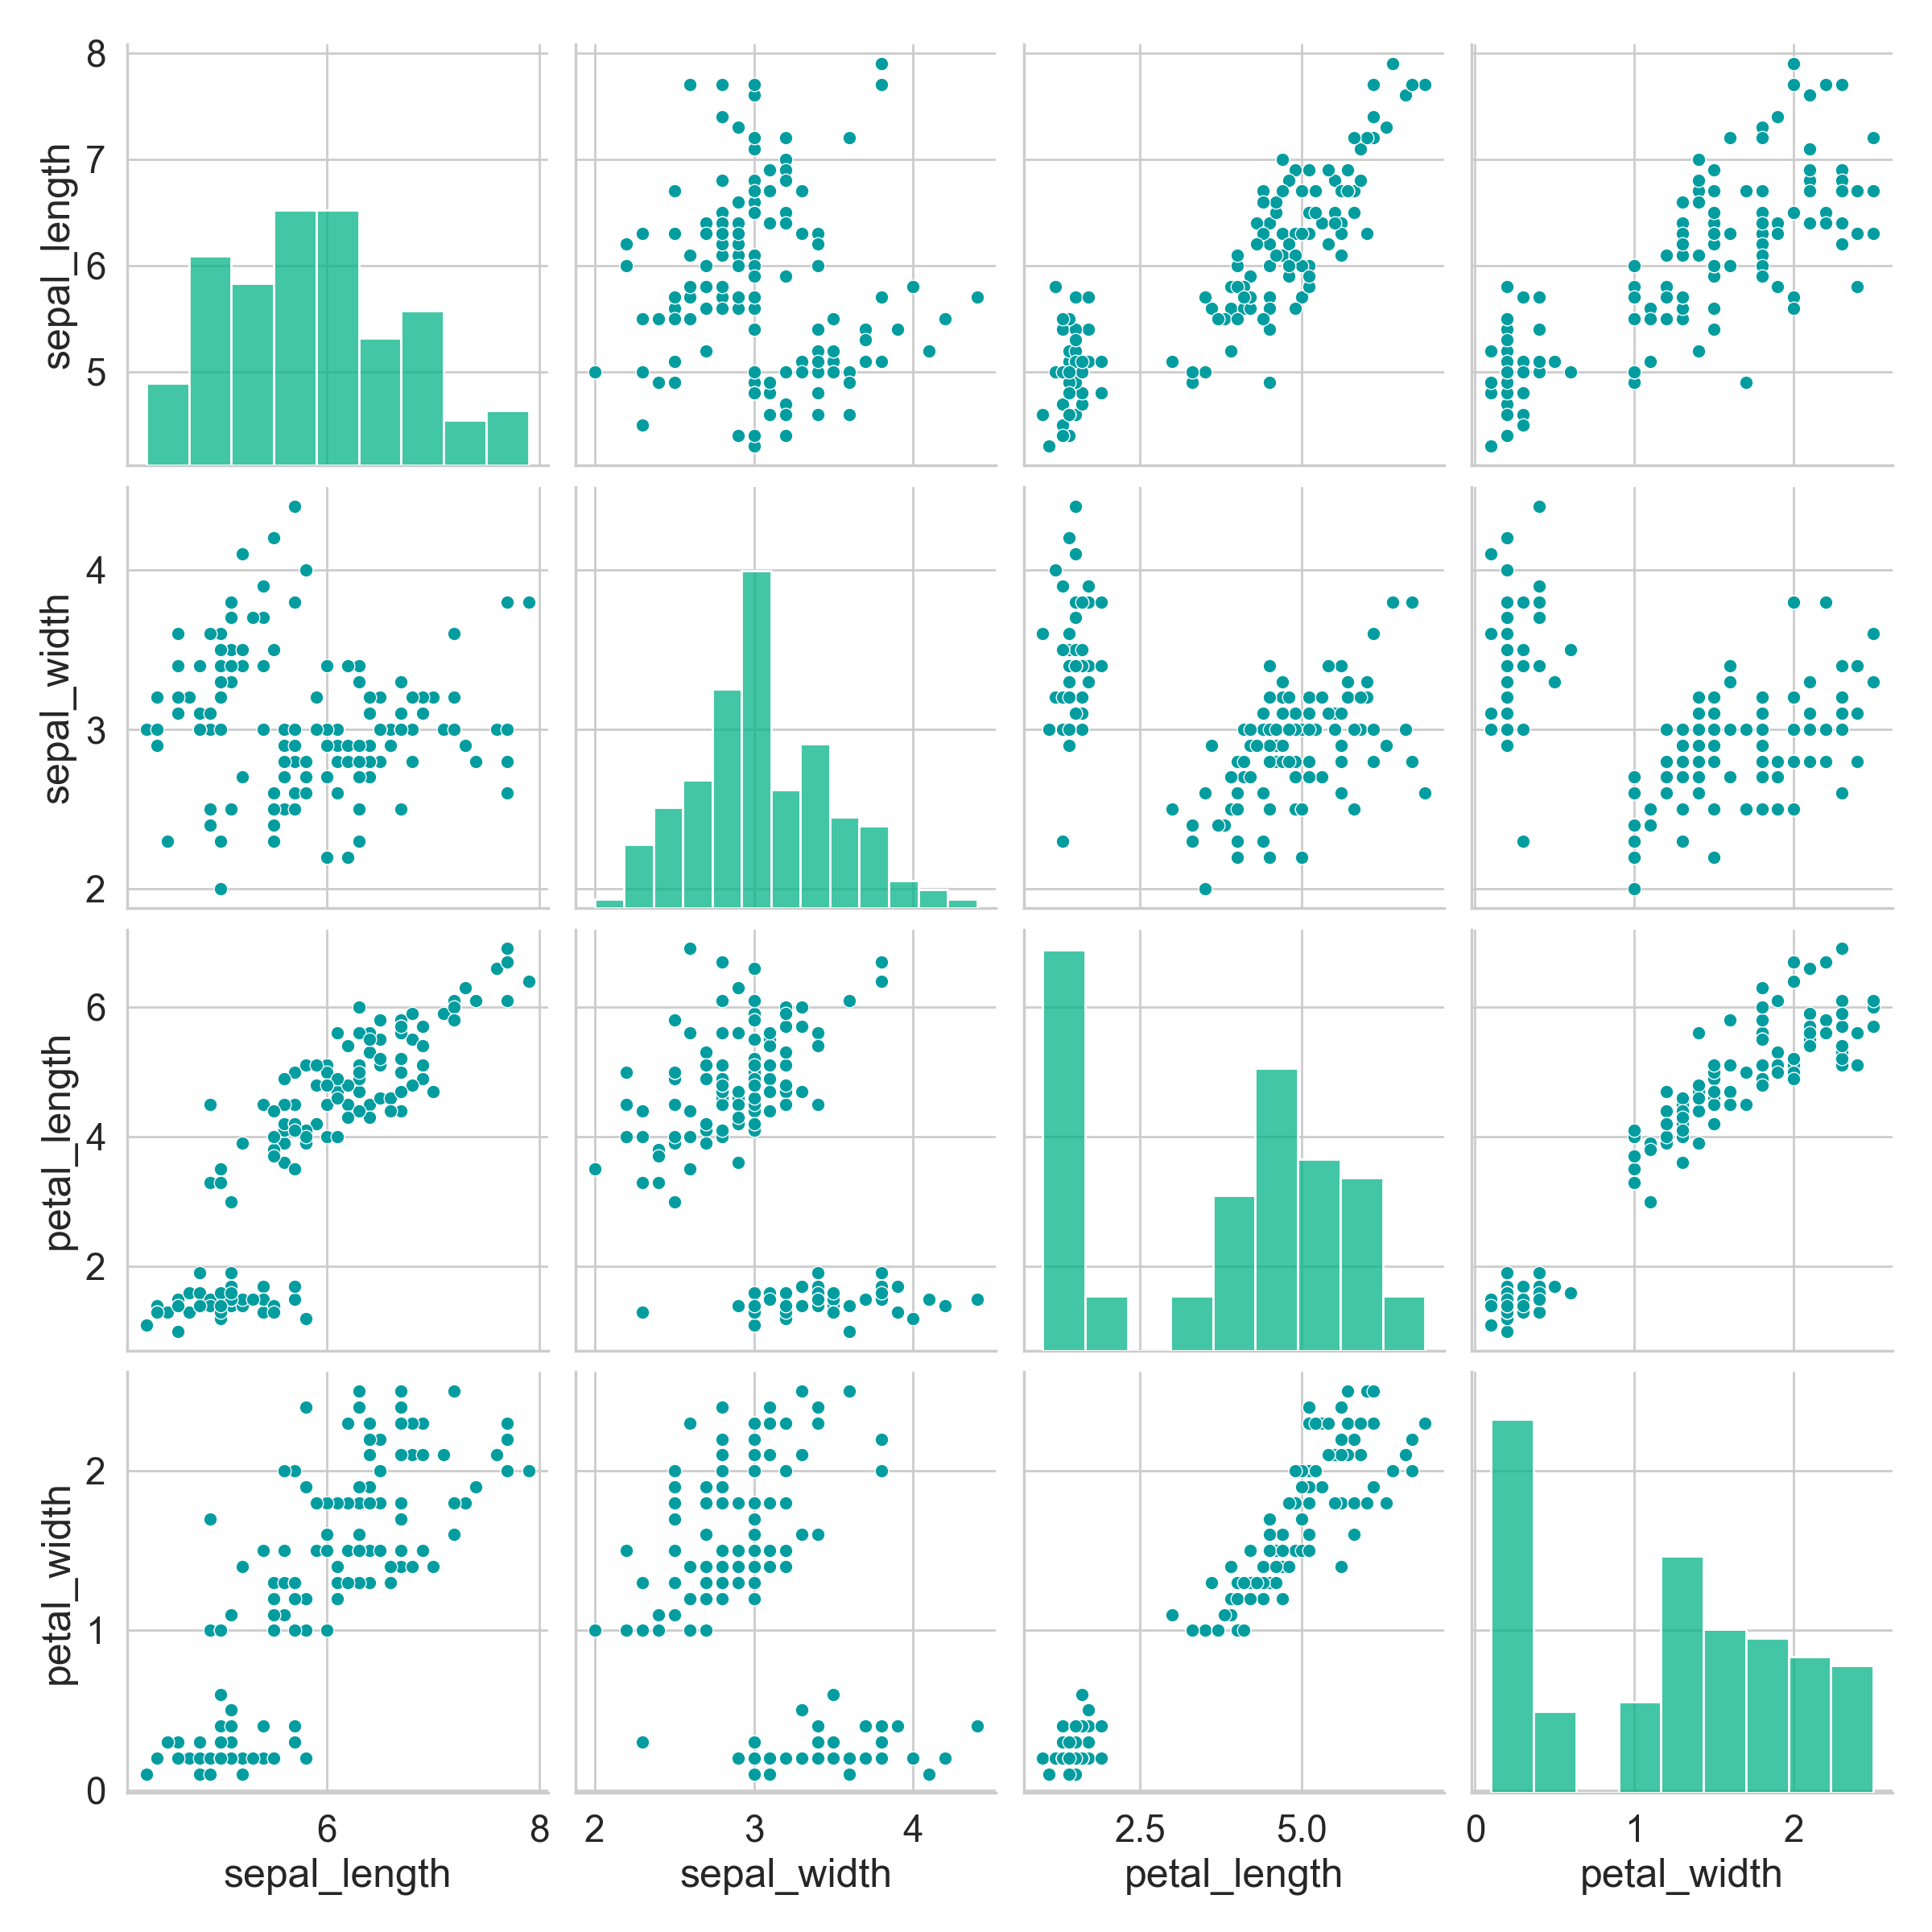

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置样式和字体大小
sns.set(style='whitegrid', font_scale=1.5)

# 加载数据集
iris_sns = sns.load_dataset("iris")

plot_kws = {'color': '#039da0'}  
diag_kws = {'color': '#04b387'}  

plt.figure(figsize=(8, 6))

# 绘制成对关系图，并直接设置子图的高度
g = sns.pairplot(iris_sns, height=3, plot_kws=plot_kws, diag_kws=diag_kws)

plt.show()


<Figure size 800x600 with 0 Axes>

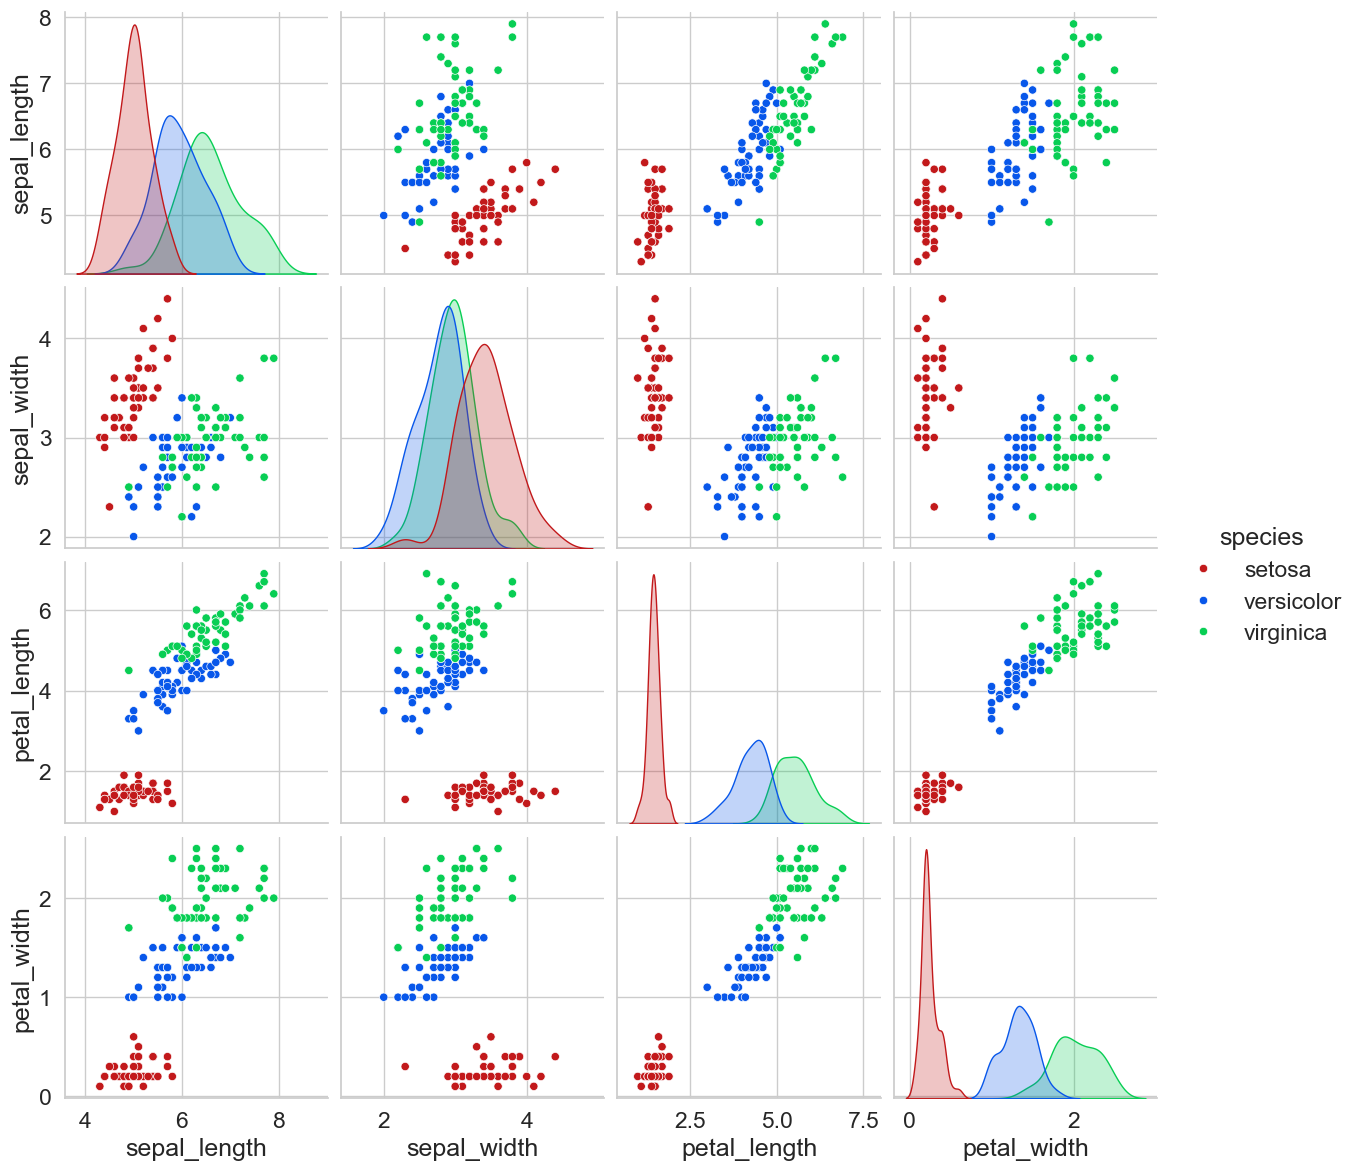

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# 设置样式和字体大小
sns.set(style='whitegrid', font_scale=1.5)

# 加载数据集
iris_sns = sns.load_dataset("iris")

# 自定义颜色
custom_palette = {"setosa": "#c2191b", "versicolor": "#0857ea", "virginica": "#08ce54"}

# 绘制成对关系图，并设置自定义颜色和子图的高度
plt.figure(figsize=(8, 6))
g = sns.pairplot(iris_sns, hue="species", palette=custom_palette, height=3)

plt.show()


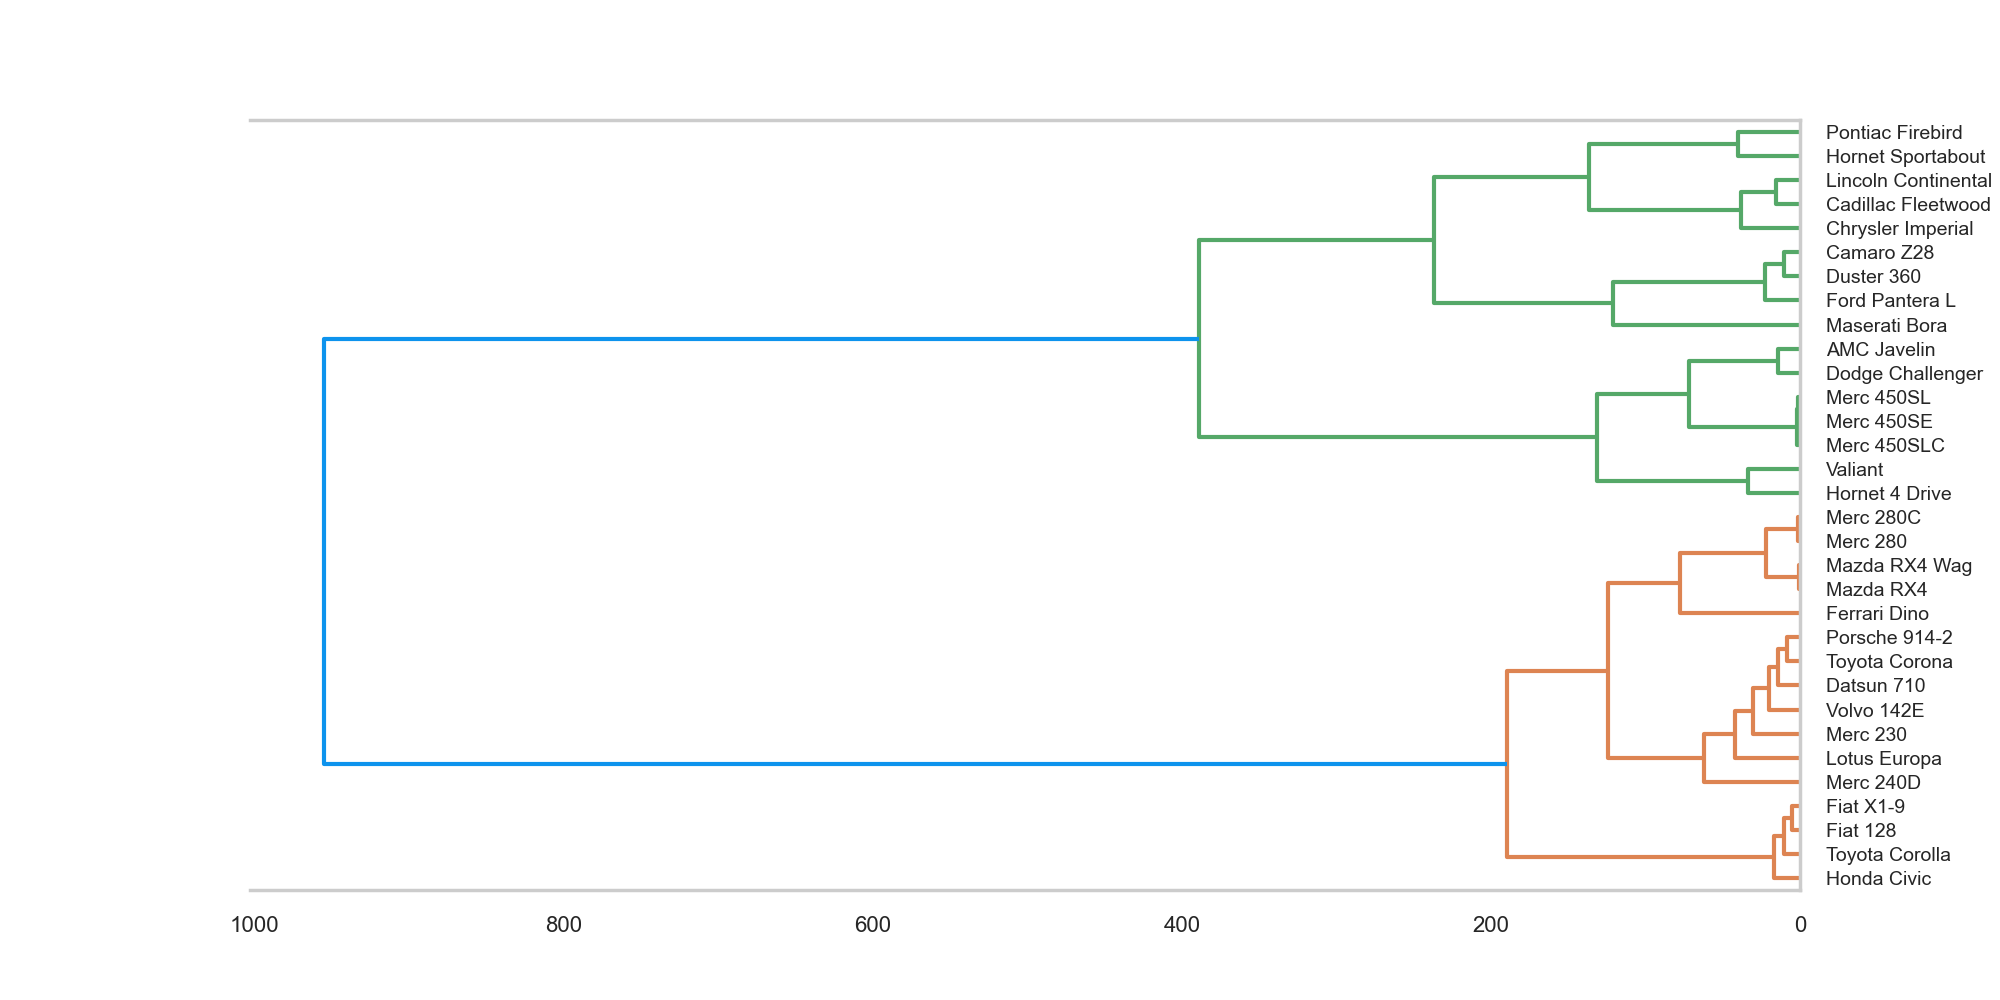

In [35]:
from plotnine.data import mtcars
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 加载 mtcars 数据集
data = mtcars.drop(columns=['name'])  # 如果包含非数值列，先删除
# 使用 linkage() 函数进行层次聚类
linked = linkage(data, method='ward')  # 使用 Ward 距离方法
# 绘制水平树形图
plt.figure(figsize=(10, 5))
dendrogram(
    linked, 
    labels=mtcars['name'].values, 
    leaf_rotation=0, 
    orientation='left', 
    above_threshold_color='#0d93ed',
)

plt.grid(False)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7)
ax = plt.gca()  # 获取当前的坐标轴
ax.spines['left'].set_visible(False)  # 取消左边框
plt.show()